<a href="https://colab.research.google.com/github/WoobinHwang/google_drive/blob/main/0331/0331_Principar_Component_Analysis_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA 
### ***중요***
- 차원 축소의 개념
- PCA개념

- 과일 사진의 경우, 10000개의 픽셀 (높이 * 너비)
  - 10000개의 특성이 있는 셈(차원)

- 정형데이터에서도 활용 가능
  - 문자열 데이터, 수치형 데이터 (연속형 데이터, 비연속형 데이터)
  - 캐글 대회: 수치형 데이터 304개
    - 연산은 RAM에서 처리
    - 라면을 5개 끓여야하는데 냄비 크기는 3개분량의 크기인 상황

- 차원축소 = 일부 특성을 선택하여 데이터 크기를 줄임
- 머신러닝 측면: 과대적합 방지 & 성능 향상

- 양적 데이터 사이의 분산-공분산 관계를 이용해서 선형결합으로 표시되는 주성분을 찾음
- 2-3개의 주성분으로 전체 변동을 찾는것이 PCA


- 알고리즘 구성 할 때, 필요한 데이터 픽셀 수
  - 300* 10000개 픽셀
  - 300 * PCA 10주성분으로 줄임
  - 기존 1시간 걸리던게 10분으로 줄어듦
  - 그럼에도 불구하고, 분류가 더 잘됨

# PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-31 06:16:41--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 06:16:41--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 06:16:41--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [53]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
print(fruits.shape)  # fruits: 3차원 배열
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape  # fruits_2d: 2차원 배열

(300, 100, 100)


(300, 10000)

- sklaern.decomposition 모듈

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 50)
# PCA 50개 성분으로 300 * 10000픽셀값을 압축
pca.fit(fruits_2d)

PCA(n_components=50)

In [83]:
print(pca.components_.shape)

(50, 10000)


- 그래프 그리기


In [84]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

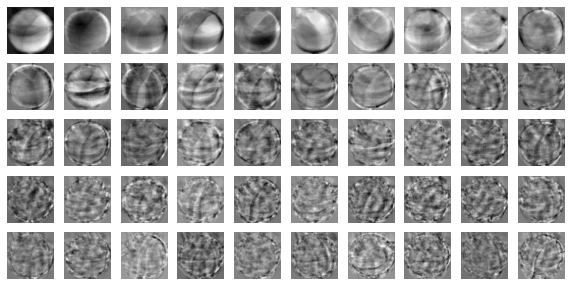

In [85]:
# draw_fruits(fruits[km.labels_ == 0])
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [86]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- 데이터의 원래 크기 대비해서 1/200 줄임
- 용량이 줄었다는 것과 똑같음

# 원본 데이터 재구성
- 10000개의 특성을 50개로 줄임
- 100% 재구성은 어렵지만, 그래도 쓸만하다.

In [87]:
# inverse_transform(): 축소시킨 데이터를 다시 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [88]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)  # 다시 3차원으로 재배열
print(fruits_reconstruct.shape)

(300, 100, 100)


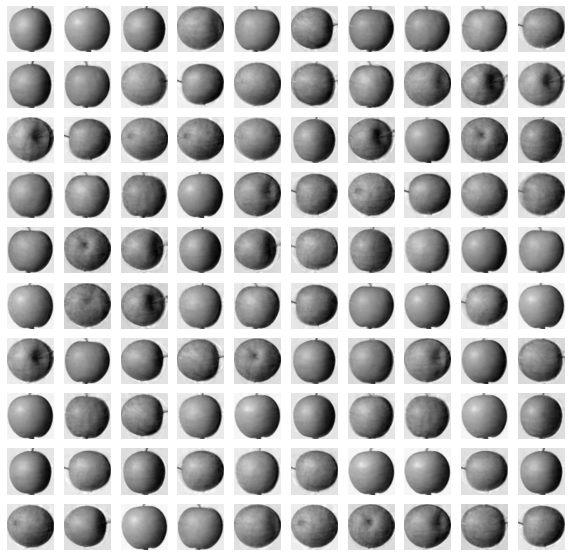

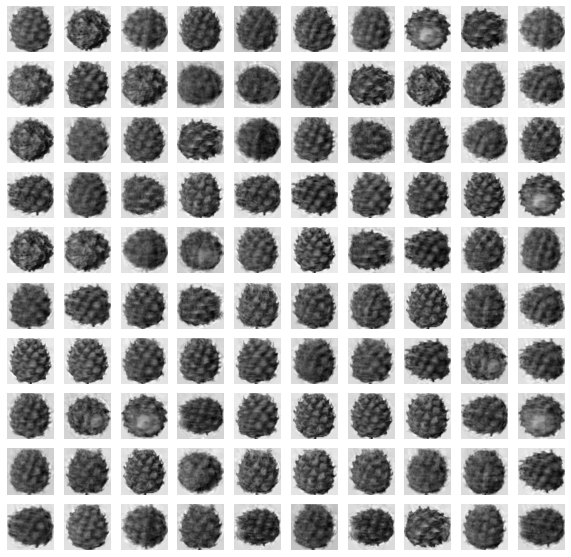

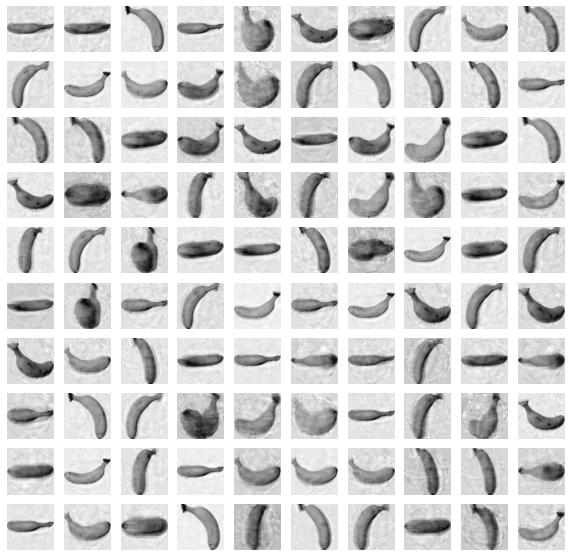

In [89]:
for  start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [80]:
# ## 주성분을 2개로 지정했을때 나오는 형태
# pca = PCA(n_components= 2)
# pca.fit(fruits_2d)

# fruits_pca = pca.transform(fruits_2d)
# # print(fruits_pca.shape)

# fruits_inverse = pca.inverse_transform(fruits_pca)
# # print(fruits_inverse.shape)

# fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
# # print(fruits_reconstruct.shape)


# for  start in [0, 100, 200]:
#   draw_fruits(fruits_reconstruct[start:start+100])
#   print("\n")

# 설명된 분산

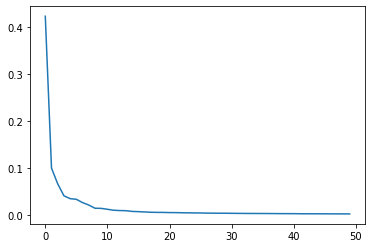

In [15]:
# explained_variance_ratio_: 분산의 비율
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 처음 10개의 주성분이 대부분의 분산을 표현한다.
- 11개 주성분부터 ~50개까지는 잘 설명이 안됨.

In [16]:
# 92퍼센트정도 설명이 가능하다는걸 확인
print(np.sum(pca.explained_variance_ratio_))

0.9215689086016662


# 다른 알고리즘과 함께 사용하기
-  3개의 과일 사진 분류 위해 로지스틱 회귀

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]* 100 + [1]* 100 + [2]* 100)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [20]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.3491935729980469


In [25]:
# PCA 수행 후, 학습 시간 비교
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.023451614379882812


- 주성분의 매개변수 개수 지정, 분산 비율 지정

In [40]:
pca = PCA(n_components= 0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


- 주성분을 2개로 압축

In [41]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [42]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03700056076049805


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [43]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


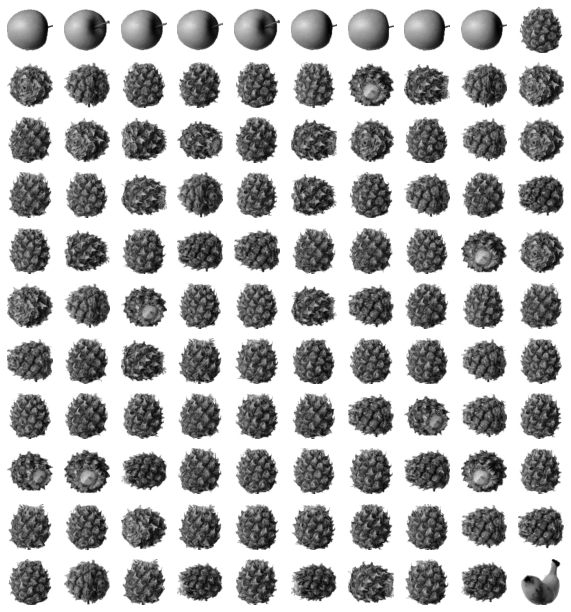

/n


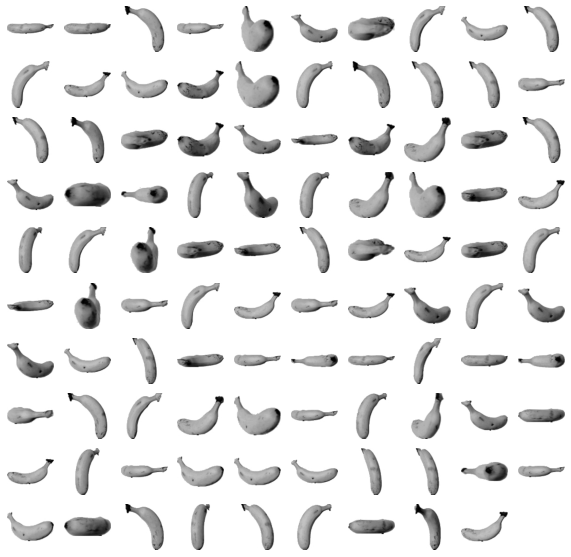

/n


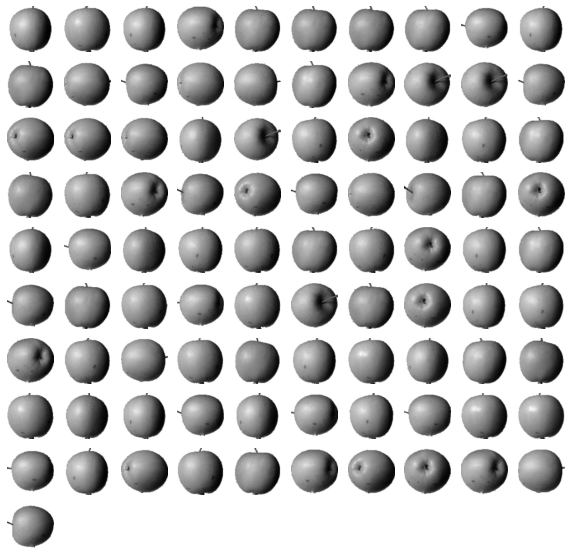

/n


In [44]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_== label])
  print("/n")

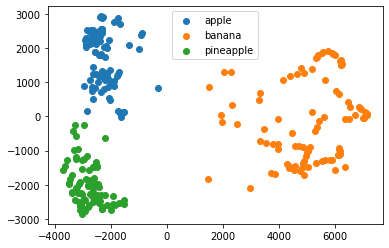

In [47]:
for label in range(0, 3):
  data = fruits_pca[km.labels_== label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

# 마무리 정리
- 키워드
  - 차원 축소: 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류. 저장공간을 줄이고 시각화 하기 쉽다. 다른 알고리즘의 성능을 높임.
  - 주성분 분석: 차원 축소의 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법
  - 설명된 분석: 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한것
- Scikit-learn 패키지
  - PCA: 주성분 분석을 수행하는 클래스
    - n_components: 주성분의 개수를 지정 [default: None](샘플 개수와 특성 개수중에서 작은 것의 값을 사용)
    - random_state: 넘파이 난수 시드값을 지정
    - 속성 components_: 훈련세트에서 찾은 주성분이 저장
    - 속성 explained_variance_ : 설명된 분산이 저장
    - 속성 explained_variance_ratio_: 설명된 분산의 비율이 저장
    - inverse_transform(): transfrom()메서드로 차원을 축소시킨 데이터를 다시 원본 차원으로 복원함.
